# PART 2A :

### Below is a report containing several graphs showing how promotions have performed in the last few weeks. All of the metrics shown are aggregated by week and grouped by restaurant segment.

In [236]:
#Connecting to database

import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


#establishing the connection
conn = psycopg2.connect(
   database="uber_data", user='postgres', password='', host='localhost', port= ''
)


size of the three splits of the dataframe should be equal for easy plotting: (19, 3), (19, 3), (19, 3)


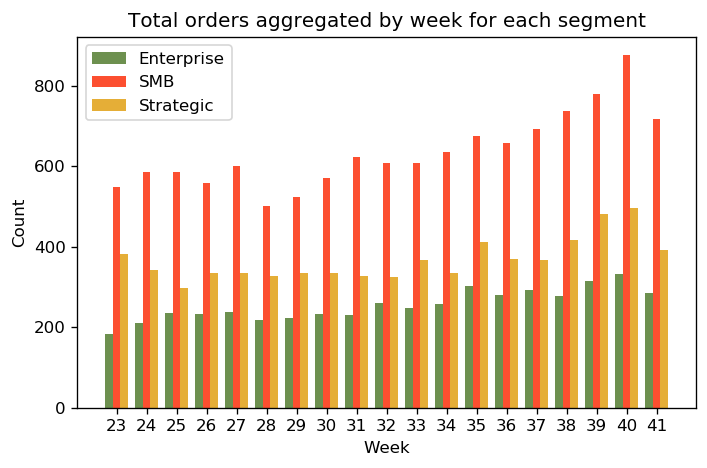

In [245]:
# 1. Total orders aggregate by week and segment

query = '''-- solution for task 2A "total orders" aggregate by week and group by segment
SELECT count(*), EXTRACT(week FROM eater_request_timestamp_utc) as "week", segment
FROM public.temp_table
GROUP BY "week", segment
Order by "week", segment;
'''

df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['week'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)

print(f'size of the three splits of the dataframe should be equal for easy plotting: {df_enterprise.shape}, {df_smb.shape}, {df_strategic.shape}')





# BAR PLOT



weeks = [ int(x) for x in df_enterprise['week'] ]
enterprise = df_enterprise['count']
smb = df_smb['count']
strategic = df_strategic['count']

x_indexes = np.arange(df_enterprise.shape[0])
width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Total orders aggregated by week for each segment')
plt.xlabel('Week')
plt.ylabel('Count')


plt.bar(x_indexes-width, enterprise, width=width, color='#6d904f', label='Enterprise')

plt.bar(x_indexes, smb, width=width, color='#fc4f30', label='SMB')

plt.bar(x_indexes+width, strategic, width=width, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
#plt.grid()
plt.xticks( ticks=x_indexes, labels=weeks)


plt.savefig('1 Total orders aggregated by week for each segment.png')

plt.show()

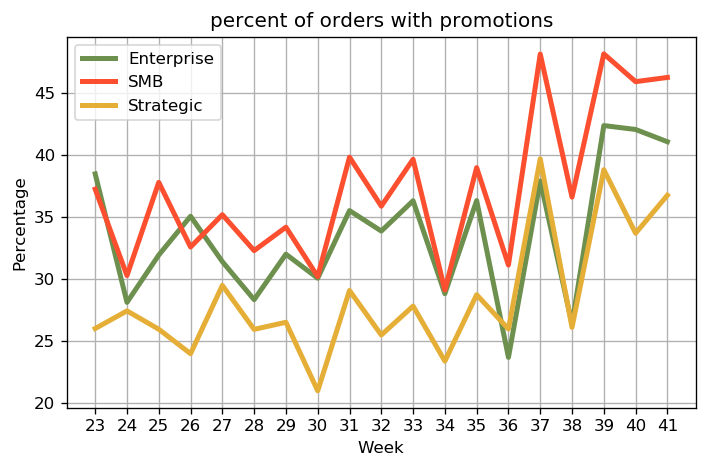

In [246]:
# 2. % of orders with promotion

query = ''' -- solution for task 2A "percent of orders with promotion" aggregate by week and group by segment
SELECT count(*), EXTRACT(week FROM eater_request_timestamp_utc) as "week", segment, 
(CASE when promo_uuid='\\N' THEN 'NO'
	 when promo_uuid!='\\N' THEN 'YES' END)promo_used
FROM public.temp_table

GROUP BY "week", segment, promo_used
Order by "week", segment, promo_used;
'''

df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['week'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)

#print(f'size of the three splits of the dataframe should be equal for easy plotting: {df_enterprise.shape}, {df_smb.shape}, {df_strategic.shape}')




# SEPERATE THE DATA AND CALCULATE PERCENTAGE, STORE IN A LIST

df_enterprise_no = df_enterprise.loc[df_enterprise['promo_used']=='NO']
df_enterprise_yes = df_enterprise.loc[df_enterprise['promo_used']=='YES']

df_enterprise_no.reset_index(inplace=True, drop=True)
df_enterprise_yes.reset_index(inplace=True, drop=True)

enterprise_perc = []
for x in range(df_enterprise_yes.shape[0]):
    enterprise_perc.append(( df_enterprise_yes['count'][x] * 100 ) / (df_enterprise_no['count'][x] + df_enterprise_yes['count'][x]))

#enterprise_perc


# SEPERATE THE DATA AND CALCULATE PERCENTAGE
df_smb_no = df_smb.loc[df_smb['promo_used']=='NO']
df_smb_yes = df_smb.loc[df_smb['promo_used']=='YES']

df_smb_no.reset_index(inplace=True, drop=True)
df_smb_yes.reset_index(inplace=True, drop=True)

smb_perc = []
for x in range(df_smb_yes.shape[0]):
    smb_perc.append(( df_smb_yes['count'][x] * 100 ) / (df_smb_no['count'][x] + df_smb_yes['count'][x]))

#smb_perc


# SEPERATE THE DATA AND CALCULATE PERCENTAGE
df_strategic_no = df_strategic.loc[df_strategic['promo_used']=='NO']
df_strategic_yes = df_strategic.loc[df_strategic['promo_used']=='YES']

df_strategic_no.reset_index(inplace=True, drop=True)
df_strategic_yes.reset_index(inplace=True, drop=True)

strategic_perc = []
for x in range(df_strategic_yes.shape[0]):
    strategic_perc.append(( df_strategic_yes['count'][x] * 100 ) / (df_strategic_no['count'][x] + df_strategic_yes['count'][x]))

#strategic_perc


# CREATING THE LIN PLOT


weeks = [ int(x) for x in df_enterprise_yes['week'] ]

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('percent of orders with promotions')
plt.xlabel('Week')
plt.ylabel('Percentage')


plt.plot(weeks, enterprise_perc, color='#6d904f',linewidth=3, label='Enterprise')

plt.plot(weeks, smb_perc, color='#fc4f30', linewidth=3, label='SMB')

plt.plot(weeks, strategic_perc, color='#e5ae37', linewidth=3, label='Strategic')

plt.legend()
plt.grid(True)
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.xticks( ticks=weeks, labels=weeks)
plt.savefig('2 percentage of orders with promotion by week and segment.png')

plt.show()

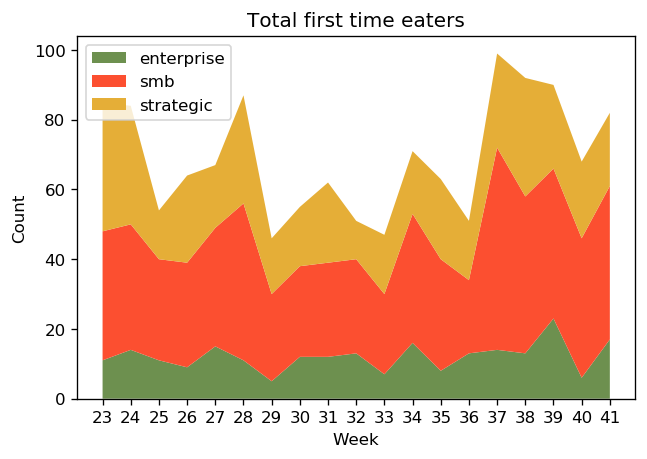

In [247]:
# 3. Total first time eaters by week and segment


query = ''' -- solution for task 2A "Total first time eaters" aggregate by week and group by segment

SELECT count(*) as total_first_time_eaters, EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
where eater_trip_rank=1
group by weeks, segment
order by weeks, segment
'''


df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['total_first_time_eaters']
smb = df_smb['total_first_time_eaters']
strategic = df_strategic['total_first_time_eaters']


# STACK PLOT

figure(dpi=120)

labels=['enterprise','smb','strategic']
colors = ['#6d904f','#fc4f30','#e5ae37']
#plt.grid()
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Total first time eaters')
plt.stackplot(weeks,enterprise,smb,strategic, colors=colors, labels=labels)
plt.xticks( ticks=weeks, labels=weeks)
plt.legend(loc='upper left')
plt.savefig('3 Total first time eaters by week and segment.png')

plt.show()

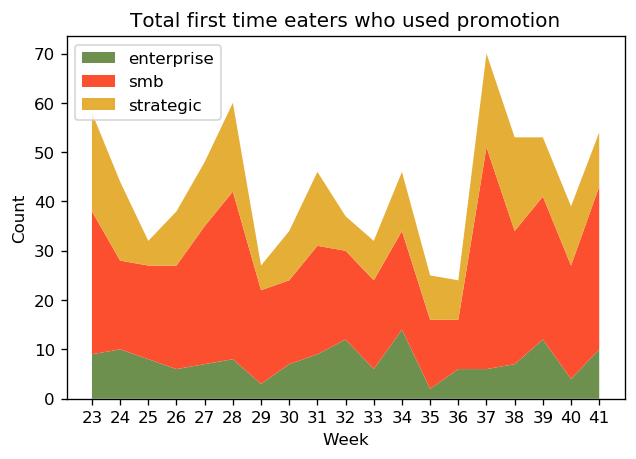

In [254]:
# 4. Total first time eaters who used a promotion by week and segment


query = ''' -- solution for task 2A "Total first time eaters who used a promotion" aggregate by week and group by segment

SELECT count(*) as total_first_time_eaters_promo, EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
where eater_trip_rank=1 AND promo_uuid != '\\N'
group by weeks, segment
order by weeks, segment

'''


df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['total_first_time_eaters_promo']
smb = df_smb['total_first_time_eaters_promo']
strategic = df_strategic['total_first_time_eaters_promo']


# STACK PLOT


labels=['enterprise','smb','strategic']
colors = ['#6d904f','#fc4f30','#e5ae37']
#plt.grid()
figure(dpi=120)

plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Total first time eaters who used promotion')
plt.stackplot(weeks,enterprise,smb,strategic, colors=colors, labels=labels)
plt.xticks( ticks=weeks, labels=weeks)
plt.legend(loc='upper left')
plt.savefig('4 Total first time eaters who used a promotion by week and segment.png')

plt.show()


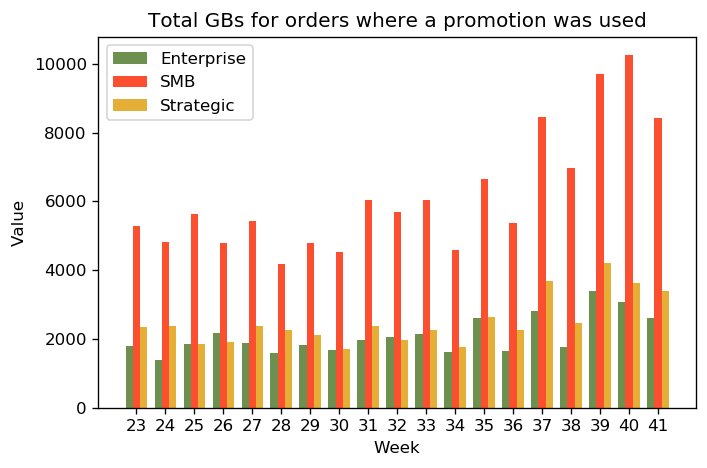

In [255]:
#5. Total GBs for orders where a promotion was used by week and segment


query = '''-- solution for task 2A "Total gross bookings for orders where a promotion was used" aggregate by week and group by segment

SELECT SUM(gross_bookings_local) as "total_gross_bookings_promo", EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
where promo_uuid != '\\N'
group by weeks, segment
order by weeks, segment
'''

df = pd.read_sql(query,conn)



# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['total_gross_bookings_promo']
smb = df_smb['total_gross_bookings_promo']
strategic = df_strategic['total_gross_bookings_promo']





# BAR PLOT

x_indexes = np.arange(df_enterprise.shape[0])
width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Total GBs for orders where a promotion was used')
plt.xlabel('Week')
plt.ylabel('Value')


plt.bar(x_indexes-width, enterprise, width=width, color='#6d904f', label='Enterprise')

plt.bar(x_indexes, smb, width=width, color='#fc4f30', label='SMB')

plt.bar(x_indexes+width, strategic, width=width, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
#plt.grid()
plt.xticks( ticks=x_indexes, labels=weeks)
plt.savefig('5 Total GBs for orders where a promotion was used by week and segment.png')

plt.show()


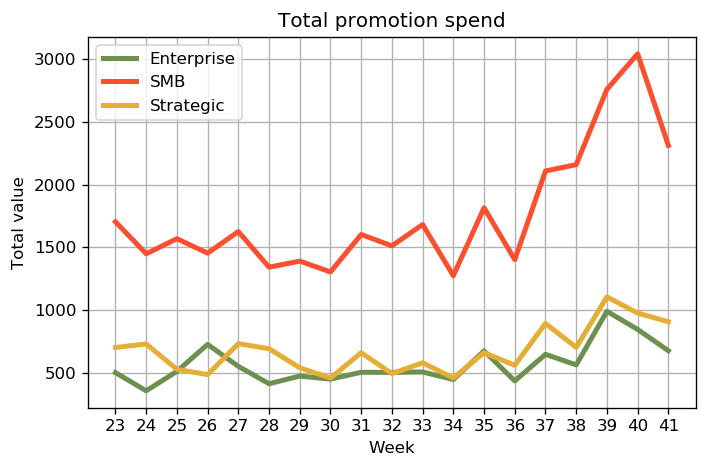

In [250]:
# 6. Total promotion spend by week and segment



query = '''-- solution for task 2A "Total promotion spend" aggregate by week and group by segment

SELECT SUM(promo_spend_local) as total_promo_spend, EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
where promo_uuid != '\\N'
group by weeks, segment
order by weeks, segment;

'''

df = pd.read_sql(query,conn)



# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['total_promo_spend']
smb = df_smb['total_promo_spend']
strategic = df_strategic['total_promo_spend']





# LINE PLOT

# x_indexes = np.arange(df_enterprise.shape[0])
# width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Total promotion spend')
plt.xlabel('Week')
plt.ylabel('Total value')


plt.plot(weeks, enterprise, linewidth=3, color='#6d904f', label='Enterprise')

plt.plot(weeks, smb, linewidth=3, color='#fc4f30', label='SMB')

plt.plot(weeks, strategic, linewidth=3, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.grid()
plt.xticks(ticks=weeks, labels=weeks)
plt.savefig('6 Total promotion spend by week and segment.png')

plt.show()



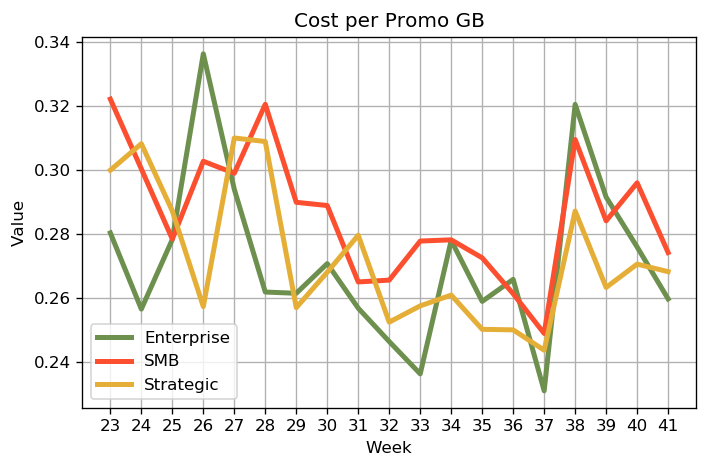

In [251]:
# 7. Cost per Promo GB (Total promotion spend / Total GBs for orders where a promotion was used) by week and segment


query = ''' -- solution for task 2A "Cost per Promo GB (Total promotion spend / Total GBs for orders where a promotion was used)" aggregate by week and group by segment

SELECT SUM(promo_spend_local)/SUM(gross_bookings_local) as cost_per_promo_gb, EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
where promo_uuid != '\\N'
group by weeks, segment
order by weeks, segment;
'''


df = pd.read_sql(query,conn)



# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['cost_per_promo_gb']
smb = df_smb['cost_per_promo_gb']
strategic = df_strategic['cost_per_promo_gb']





# LINE PLOT

# x_indexes = np.arange(df_enterprise.shape[0])
# width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Cost per Promo GB')
plt.xlabel('Week')
plt.ylabel('Value')


plt.plot(weeks, enterprise, linewidth=3, color='#6d904f', label='Enterprise')

plt.plot(weeks, smb, linewidth=3, color='#fc4f30', label='SMB')

plt.plot(weeks, strategic, linewidth=3, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.grid()
plt.xticks(ticks=weeks, labels=weeks)
plt.savefig('7 Total promo spend by Total GBs for orders with promo week and segment.png')

plt.show()


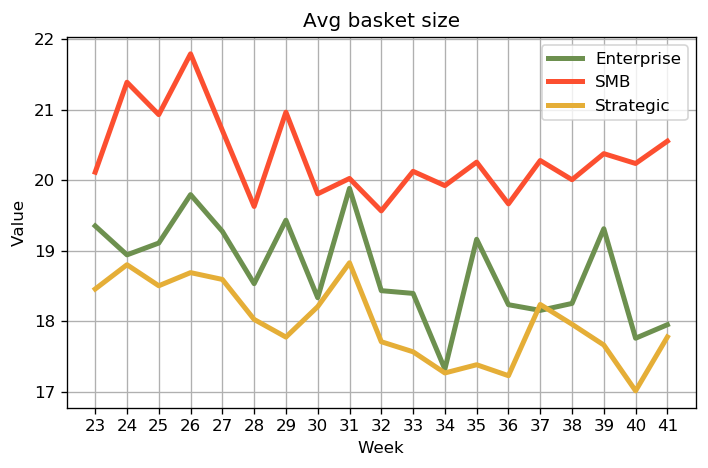

In [252]:
# 8. Average basket size by week and segment


query = ''' -- solution for task 2A "Average Basket size" aggregate by week and group by segment

SELECT AVG(meal_subtotal_local) as average_basket_size, EXTRACT(week FROM eater_request_timestamp_utc) as weeks, segment 
FROM public.temp_table
group by weeks, segment
order by weeks, segment;
'''


df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['average_basket_size']
smb = df_smb['average_basket_size']
strategic = df_strategic['average_basket_size']


# LINE PLOT

# x_indexes = np.arange(df_enterprise.shape[0])
# width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Avg basket size')
plt.xlabel('Week')
plt.ylabel('Value')


plt.plot(weeks, enterprise, linewidth=3, color='#6d904f', label='Enterprise')

plt.plot(weeks, smb, linewidth=3, color='#fc4f30', label='SMB')

plt.plot(weeks, strategic, linewidth=3, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.grid()
plt.xticks(ticks=weeks, labels=weeks)
plt.savefig('8 Average basket size by week and segment.png')

plt.show()


# Part 2B:

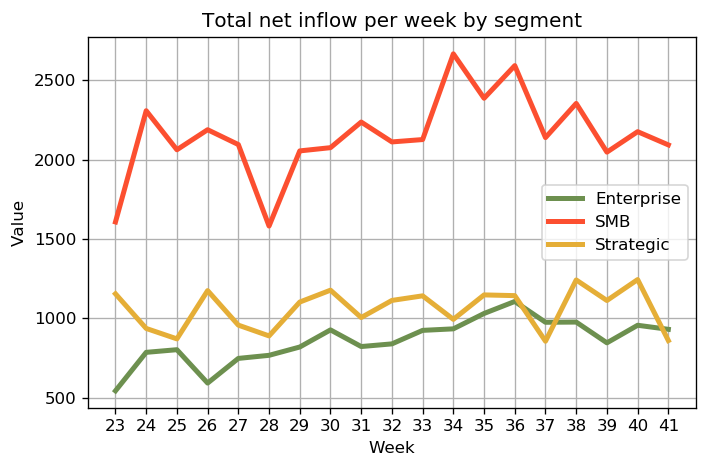

In [256]:
query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total net inflow per week by segment

SELECT SUM(net_inflows_local) as total_net_inflow, extract(week from eater_request_timestamp_utc) as weeks, segment
FROM public.temp_table
group by weeks, segment
order by weeks asc, segment asc;
'''


df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['total_net_inflow']
smb = df_smb['total_net_inflow']
strategic = df_strategic['total_net_inflow']


# LINE PLOT

# x_indexes = np.arange(df_enterprise.shape[0])
# width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Total net inflow per week by segment')
plt.xlabel('Week')
plt.ylabel('Value')


plt.plot(weeks, enterprise, linewidth=3, color='#6d904f', label='Enterprise')

plt.plot(weeks, smb, linewidth=3, color='#fc4f30', label='SMB')

plt.plot(weeks, strategic, linewidth=3, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.grid()
plt.xticks(ticks=weeks, labels=weeks)
plt.savefig('2B 1 Total net inflow per week by segment.png')

plt.show()




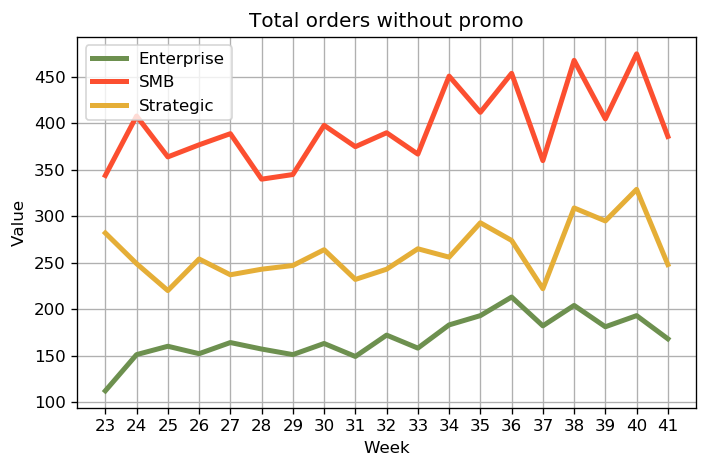

In [261]:
query= ''' -- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total orders without promo

SELECT COUNT(*) , extract(week from eater_request_timestamp_utc) as weeks, segment
FROM public.temp_table
WHERE promo_uuid='\\N'
group by weeks, segment
order by weeks asc, segment asc;
'''



df = pd.read_sql(query,conn)

#Closing the connection
# conn.close()

# SEPARATING THE DATA
df_enterprise = df.loc[df.segment=='Enterprise']
df_smb = df.loc[df.segment=='SMB']
df_strategic = df.loc[df.segment=='Strategic']

weeks = [ int(x) for x in df_enterprise['weeks'] ]

df_enterprise.reset_index(inplace=True, drop=True)
df_smb.reset_index(inplace=True, drop=True)
df_strategic.reset_index(inplace=True, drop=True)


enterprise = df_enterprise['count']
smb = df_smb['count']
strategic = df_strategic['count']


# LINE PLOT

# x_indexes = np.arange(df_enterprise.shape[0])
# width = 0.25

#plt.style.use('ggplot')
figure(dpi=120)

plt.title('Total orders without promo')
plt.xlabel('Week')
plt.ylabel('Value')


plt.plot(weeks, enterprise, linewidth=3, color='#6d904f', label='Enterprise')

plt.plot(weeks, smb, linewidth=3, color='#fc4f30', label='SMB')

plt.plot(weeks, strategic, linewidth=3, color='#e5ae37', label='Strategic')

plt.legend()
plt.tight_layout() # makes the padding better for dsiplay on screens
plt.grid()
plt.xticks(ticks=weeks, labels=weeks)
plt.savefig('2B 2 Total orders without promo.png')

plt.show()





In [197]:
# FUNCTION FOR CREATING BAR PLOTS


def bar_plot(query, value_to_plot ,conn,title,y_label):


    df = pd.read_sql(query,conn)

    #Closing the connection
    # conn.close()

    # SEPARATING THE DATA
    df_enterprise = df.loc[df.segment=='Enterprise']
    df_smb = df.loc[df.segment=='SMB']
    df_strategic = df.loc[df.segment=='Strategic']

    #weeks = [ int(x) for x in df_enterprise['day_of_week'] ]

    df_enterprise.reset_index(inplace=True, drop=True)
    df_smb.reset_index(inplace=True, drop=True)
    df_strategic.reset_index(inplace=True, drop=True)

    #print(f'size of the three splits of the dataframe should be equal for easy plotting: {df_enterprise.shape}, {df_smb.shape}, {df_strategic.shape}')



    # BAR PLOT

    #days = [ int(x) for x in df_enterprise['day_of_week'] ]
    enterprise = df_enterprise[value_to_plot]
    smb = df_smb[value_to_plot]
    strategic = df_strategic[value_to_plot]

    x_indexes = np.arange(df_enterprise.shape[0])
    width = 0.25

    #plt.style.use('ggplot')

    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel(y_label)


    plt.bar(x_indexes-width, enterprise, width=width, color='#6d904f', label='Enterprise')

    plt.bar(x_indexes, smb, width=width, color='#fc4f30', label='SMB')

    plt.bar(x_indexes+width, strategic, width=width, color='#e5ae37', label='Strategic')

    plt.legend()
    plt.tight_layout() # makes the padding better for dsiplay on screens
    #plt.savefig('plot.png')
    #plt.grid()
    labels=['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
    plt.xticks( ticks=x_indexes, labels=labels)

    plt.show()

## We can calculate similar metrics "Day of Week" wise too. This would reveal the spending patterns of the customer based on the days.

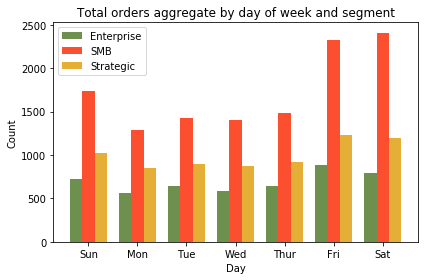

In [201]:
# 1. Total orders aggregate by day of week and segment

query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total Orders

SELECT count(*), extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
group by day_of_week, segment 
order by day_of_week asc, segment asc;
'''

bar_plot(query=query,value_to_plot='count', conn=conn, title='Total orders aggregate by day of week and segment',y_label='Count')



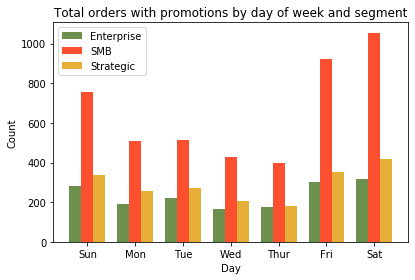

In [204]:
# 2. Total orders with promotions aggregate by day of week and segment

query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total Orders with promotions

SELECT count(*) as total_orders_with_promo, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
WHERE promo_uuid!='\\N'
group by day_of_week, segment 
order by day_of_week asc, segment asc;

'''


bar_plot(query=query,value_to_plot='total_orders_with_promo', conn=conn, title='Total orders with promotions by day of week and segment',y_label='Count')


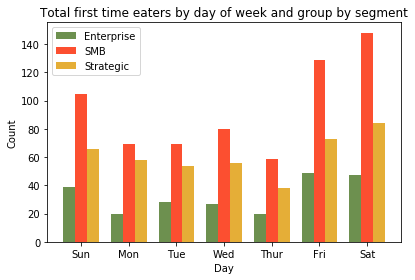

In [205]:
# 3.Total first time eaters aggregate by day of week and group by segment

query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total first time eaters

SELECT count(*) as total_first_time_eaters, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
WHERE eater_trip_rank=1
group by day_of_week, segment 
order by day_of_week asc,    segment asc;
'''


bar_plot(query=query,value_to_plot='total_first_time_eaters', conn=conn, title='Total first time eaters by day of week and group by segment',y_label='Count')




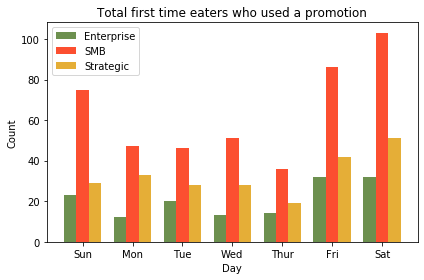

In [206]:
# 4. Total first time eaters who used a promotion

query = ''' -- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total first time eaters who used a promotion

SELECT count(*) as total_first_time_eaters_promo, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
WHERE eater_trip_rank=1 AND promo_uuid!='\\N'
group by day_of_week, segment 
order by day_of_week asc, segment asc;
'''


bar_plot(query=query,value_to_plot='total_first_time_eaters_promo', conn=conn, title='Total first time eaters who used a promotion',y_label='Count')

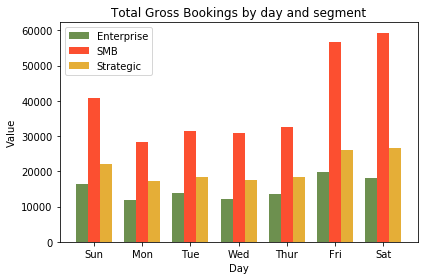

In [207]:
# 5. Total Gross Bookings


query = '''
-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total GBs

SELECT SUM(gross_bookings_local) as total_gross_bookings, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
group by day_of_week, segment 
order by day_of_week asc, segment asc;
'''


bar_plot(query=query,value_to_plot='total_gross_bookings', conn=conn, title='Total Gross Bookings by day and segment',y_label='Value')



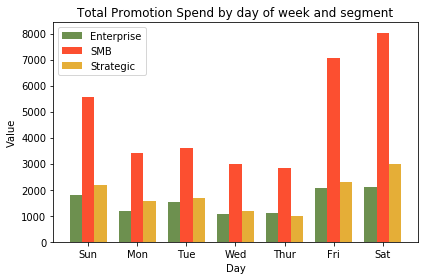

In [208]:
# 6. Total Promotion Spend by day of week and segment

query = '''
-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total Promotion Spend

SELECT SUM(promo_spend_local) as total_promo_spend, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
group by day_of_week, segment 
order by day_of_week asc, segment asc;
'''

bar_plot(query=query,value_to_plot='total_promo_spend', conn=conn, title='Total Promotion Spend by day of week and segment',y_label='Value')



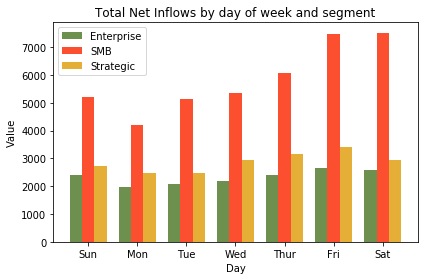

In [209]:
# 7. Total Net Inflows

query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Total net inflows


SELECT SUM(net_inflows_local) as total_net_inflow, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
group by day_of_week, segment 
order by day_of_week asc, segment asc;
'''

bar_plot(query=query,value_to_plot='total_net_inflow', conn=conn, title='Total Net Inflows by day of week and segment',y_label='Value')



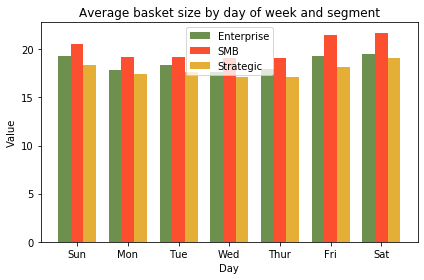

In [210]:
# 8.Average basket size
query ='''
-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Average basket size
SELECT AVG(meal_subtotal_local) as average_basket_size, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
group by day_of_week, segment
order by day_of_week asc, segment asc;
'''

bar_plot(query=query,value_to_plot='average_basket_size', conn=conn, title='Average basket size by day of week and segment',y_label='Value')

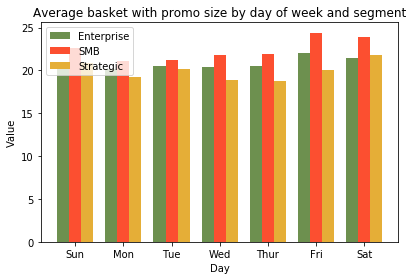

In [212]:
#9. Average basket size from promotion
query = '''-- solution for task 2B "surface additional insights / metrics" aggregate by week and group by segment
-- Average basket size where promo used

SELECT AVG(meal_subtotal_local) as average_basket_size_promo, extract(dow from eater_request_timestamp_utc) as day_of_week, segment
FROM public.temp_table
WHERE promo_uuid!='\\N'
group by day_of_week, segment
order by day_of_week asc, segment asc'''

bar_plot(query=query,value_to_plot='average_basket_size_promo', conn=conn, title='Average basket with promo size by day of week and segment', y_label='Value')
